#Muhammad Rizky Rasyid Syahputra 
<p>09011281823034
<p>SK5A



# Prediksi Tipe Wine Alkohol Atau Non Alkohol

### Import Library

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn
import keras

### Load Dataset

In [ ]:
dataset = pd.read_csv("wine_dataset.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD180/OD205 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Wine 

### Melihat Persebaran Data
Melihat persebaran data numerik

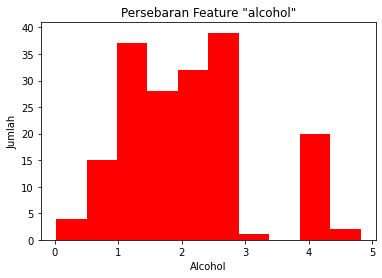

In [ ]:
plt.hist(dataset['Alcohol'], color="red")
plt.xlabel("Alcohol")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "alcohol"')
plt.show()

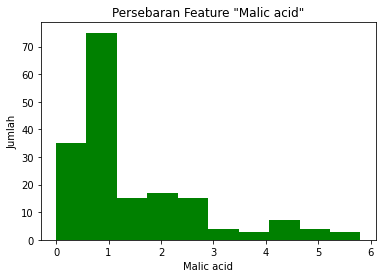

In [ ]:
plt.hist(dataset['Malic acid'], color="green")
plt.xlabel("Malic acid")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "Malic acid"')
plt.show()

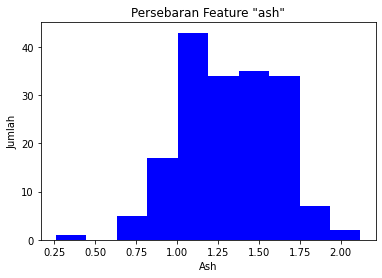

In [ ]:
plt.hist(dataset['Ash'], color="blue")
plt.xlabel("Ash")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "ash"')
plt.show()

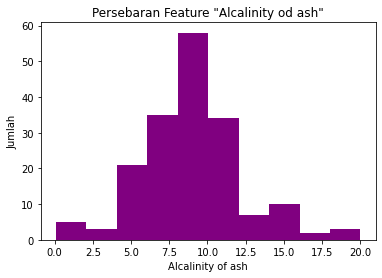

In [ ]:
plt.hist(dataset['Alcalinity of ash'], color="purple")
plt.xlabel("Alcalinity of ash")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "Alcalinity od ash"')
plt.show()

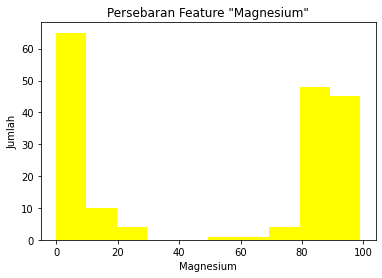

In [ ]:
plt.hist(dataset['Magnesium'], color="yellow")
plt.xlabel("Magnesium")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "Magnesium"')
plt.show()

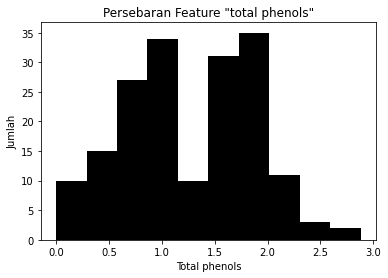

In [ ]:
plt.hist(dataset['Total phenols'], color="black")
plt.xlabel("Total phenols")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "total phenols"')
plt.show()

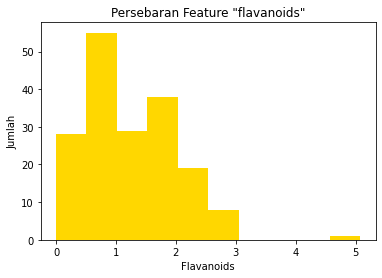

In [ ]:
plt.hist(dataset['Flavanoids'], color="gold")
plt.xlabel("Flavanoids")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "flavanoids"')
plt.show()

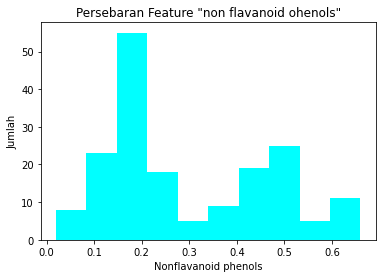

In [ ]:
plt.hist(dataset['Nonflavanoid phenols'], color="aqua")
plt.xlabel("Nonflavanoid phenols")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "non flavanoid ohenols"')
plt.show()

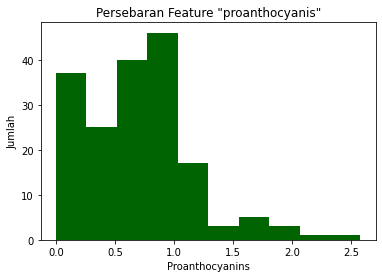

In [ ]:
plt.hist(dataset['Proanthocyanins'], color="darkgreen")
plt.xlabel("Proanthocyanins")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "proanthocyanis"')
plt.show()

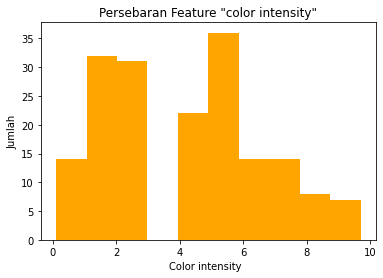

In [ ]:
plt.hist(dataset['Color intensity'], color="orange")
plt.xlabel("Color intensity  ")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "color intensity"')
plt.show()

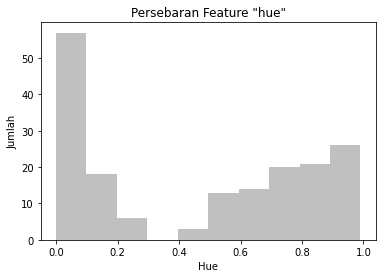

In [ ]:
plt.hist(dataset['Hue'], color="silver")
plt.xlabel("Hue")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "hue"')
plt.show()

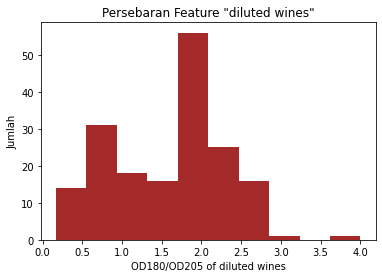

In [ ]:
plt.hist(dataset['OD180/OD205 of diluted wines'], color="brown")
plt.xlabel("OD180/OD205 of diluted wines")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "diluted wines"')
plt.show()

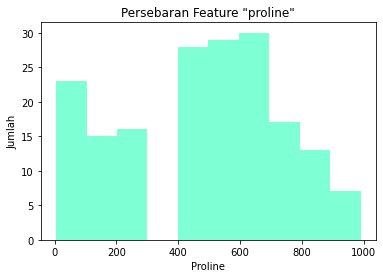

In [ ]:
plt.hist(dataset['Proline'], color="aquamarine")
plt.xlabel("Proline")
plt.ylabel("Jumlah")
plt.title('Persebaran Feature "proline"')
plt.show()

### Set data dan Target
Set data untuk feature yaitu kolom 1-13, dan kolom 14 sebagai target

In [ ]:
data_raw = dataset.iloc[:,0:13].values
target = dataset.iloc[:,13].values

In [ ]:
dataa=pd.DataFrame(data_raw)
dataa

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.12,0.70,1.42,5.6,17.0,1.80,2.06,0.18,1.19,5.64,0.04,2.91,65.0
1,2.10,0.78,1.04,0.1,0.0,1.65,1.76,0.16,0.18,4.28,0.05,2.40,50.0
2,2.06,1.26,1.67,8.6,0.0,1.80,2.14,0.20,1.80,5.68,0.02,2.07,85.0
3,4.27,0.95,1.50,6.8,2.0,2.85,2.49,0.14,1.08,7.80,0.86,2.45,480.0
4,2.14,1.59,1.87,10.0,8.0,1.80,1.69,0.29,0.81,4.21,0.04,1.92,725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.70,5.65,1.45,10.5,95.0,0.68,0.60,0.51,0.06,7.70,0.64,0.74,740.0
174,2.40,2.90,1.48,12.0,1.0,0.80,0.75,0.42,0.40,7.20,0.70,0.56,750.0
175,2.17,4.18,1.16,10.0,10.0,0.59,0.69,0.42,0.25,0.10,0.59,0.56,825.0
176,2.07,1.59,1.27,10.0,10.0,0.65,0.68,0.52,0.46,9.20,0.60,0.61,840.0


### Scaling
Karena dilihat pada persebaran data, agar data tidak memiliki standar deviasi yang tinggi, maka selanjutnya akan discaling, dimana nilai max adalah 1 dan minimal adalah 0

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)

#Buat Variabel data_dataframe hanya untuk menampilkan, selanjutnya variabel data akan tetap dalam bentuk numpy array
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.854167,0.120690,0.623656,0.276382,0.171717,0.625000,0.405512,0.250000,0.461240,0.577083,0.040404,0.715405,0.060914
1,0.433333,0.134483,0.419355,0.000000,0.000000,0.572917,0.346457,0.218750,0.069767,0.435417,0.050505,0.582245,0.045685
2,0.425000,0.217241,0.758065,0.427136,0.000000,0.625000,0.421260,0.281250,0.697674,0.581250,0.020202,0.496084,0.081218
3,0.885417,0.163793,0.666667,0.336683,0.020202,0.989583,0.490157,0.187500,0.418605,0.802083,0.868687,0.595300,0.482234
4,0.441667,0.274138,0.865591,0.497487,0.080808,0.625000,0.332677,0.421875,0.313953,0.428125,0.040404,0.456919,0.730964


In [ ]:
# number of Wine classes
classifications = 3

### Splitting
Membagi data secara acak, dengan persentase 80% untuk data latih, 20% untuk data testing. Random state digunakan agar data yang sudah baik, tidak diacak lagi saat spliting, agar persebaran data tidak berubah, yang bisa mempengaruhi learning dari model.

In [ ]:
data_training, data_testing, target_training, target_testing = train_test_split(data_raw, target, test_size=0.2, random_state=42)

In [ ]:
## mengcopy nilai asli sebelum di encoding
target_real=target_testing

### One hot encoding

In [ ]:
target_training = keras.utils.to_categorical(target_training-1, classifications)
target_testing = keras.utils.to_categorical(target_testing-1, classifications)

### MODEL
Menggunakan 1 input layer dengan 13 neuron, 1 hidden layer dengan 30 neuron (fungsi aktivasi relu), dan 1 output layer dengan 1 neuron (fungsi aktivasi softmax).

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(classifications, activation='softmax'))

### Compile Data
Menggunakan categorical_crossentropy, dan metric Akurasi sebagai parameternya

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

### FIT
Proses training model. Disini akan dilakukan training model, dimana JST akan melakukan learning berdasarkan data latih yaitu **data_training** (feature) dan **target_training** (target). Disini juga dilakukan validasi dengan data uji, ditampung pada variabel **data_testing** (feature) dan **target_testing** (target). Guna dilakukan FIT adalah agar setiap epochnya dapat ditampung dalam variabel **history_validasi**, sehingga bisa diplot perubahannya.

In [ ]:
history_validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing), epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 65ms/step - loss: 96.0537 - accuracy: 0.3169 - val_loss: 67.8928 - val_accuracy: 0.3889
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 68.2082 - accuracy: 0.3169 - val_loss: 44.4393 - val_accuracy: 0.3611
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 40.7904 - accuracy: 0.3028 - val_loss: 20.9490 - val_accuracy: 0.2778
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 14.7520 - accuracy: 0.2394 - val_loss: 8.7716 - val_accuracy: 0.2500
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 11.1585 - accuracy: 0.2958 - val_loss: 12.5759 - val_accuracy: 0.2222
Epoch 6/1000
5/5 [==============================] - 0s 5ms/step - loss: 14.0267 - accuracy: 0.3239 - val_loss: 13.9238 - val_accuracy: 0.2500
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 14.0558 - accuracy: 0.3099 - val_loss: 12.8939 - val_accuracy: 0.2500
Epoch 

### Perhitungan Akurasi
Evaluasi dengan mencari skor data testing atau akurasi data testing. Nilai evaluasi disimpan pada variabel **scores**.

In [ ]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9444
Akurasi data Testing = 94.44%


### Plot akurasi model
Evaluasi akurasi model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

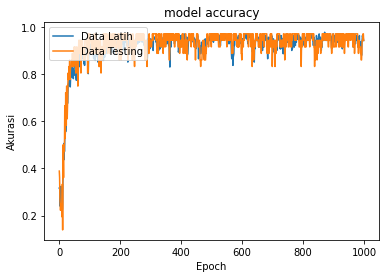

In [ ]:
plt.plot(history_validasi.history['accuracy'])
plt.plot(history_validasi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Plot Loss
Evaluasi loss/error model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

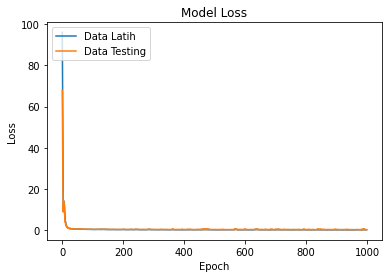

In [ ]:
plt.plot(history_validasi.history['loss'])
plt.plot(history_validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Confussion Matrix

Selanjutnya untuk mengevaluasi hasil prediksi, akan dibuat confussion matriks. Fungsinya untuk melihat hasil prediksi, yang akan digolongkan menjadi beberapa kategori. Karena klasifikasinya adalah binary (1 dan 0) maka ada 4 kemungkinan prediksi yaitu True Positive, False Positive, False Negative, True Negative. Berikut ditampilkan hasil dari setiap klasifikasinya. Pertama adalah menampun isi dari prediksi pada variabel prediction

In [ ]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(data_testing)+1
for i in range (len(prediction)):
    if(prediction[i]==3):
        prediction[i]=0
cm = confusion_matrix(target_real, prediction)
cm

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[13,  1,  0],
       [ 0, 13,  1],
       [ 0,  0,  8]])

In [ ]:
print(target_real)
print(prediction)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
[0 0 2 0 1 0 1 2 1 2 1 2 0 1 0 1 1 1 0 1 0 1 2 2 2 2 1 1 1 0 0 1 2 0 0 0]


In [ ]:
#Label 0
tp = cm[0,0]
tn = cm[1,1] + cm[2,2]  
fp = cm[1,0] + cm[2,0]  
fn = cm[0,1] + cm[0,2] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  0.9285714285714286
F1 :  0.962962962962963
spec :  1.0
sensitivity :  0.9285714285714286
akurasi :  0.9714285714285714


In [ ]:
#Label 1
tp = cm[1,1]
tn = cm[0,0] + cm[2,2] 
fp = cm[0,1] + cm[2,1] 
fn = cm[1,0] + cm[1,2] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9285714285714286
recall :  0.9285714285714286
F1 :  0.9285714285714286
spec :  0.9545454545454546
sensitivity :  0.9285714285714286
akurasi :  0.9444444444444444


In [ ]:
#Label 2
tp = cm[2,2]
tn = cm[0,0] + cm[1,1] 
fp = cm[0,2] + cm[1,2] 
fn = cm[2,0] + cm[2,1] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.8888888888888888
recall :  1.0
F1 :  0.9411764705882353
spec :  0.9629629629629629
sensitivity :  1.0
akurasi :  0.9714285714285714


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_real,prediction))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      0.93      0.93        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

